In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/ambulance_routing_dataset1.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.columns)

Index(['Ambulance Latitude', 'Ambulance Longitude', 'Hospital Latitude',
       'Hospital Longitude', 'Traffic Level', 'Weather Type', 'Road Type',
       'Distance to Hospital', 'Traffic Speed', 'Time of Day',
       'Estimated Travel Time (Target)'],
      dtype='object')


In [5]:
df.head()

,Ambulance Latitude,Ambulance Longitude,Hospital Latitude,Hospital Longitude,Traffic Level,Weather Type,Road Type,Distance to Hospital,Traffic Speed,Time of Day,Estimated Travel Time (Target)
0,12.956638,77.626077,13.0,77.7,Moderate,Snowy,Main Road,9.349159,49.035258,Evening,11.439718
1,12.871174,77.845704,13.1,77.8,Low,Rainy,Highway,25.921695,81.070959,Morning,19.184449
2,12.904345,77.892298,12.9,77.6,Moderate,Rainy,Highway,31.685155,31.874026,Afternoon,59.644467
3,13.100339,77.989387,12.9,77.6,Low,Clear,Highway,47.708350,69.246106,Afternoon,41.338079
4,13.070092,77.769220,12.9,77.6,High,Foggy,Residential,26.341923,15.283910,Afternoon,103.410409


In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from sklearn.preprocessing import LabelEncoder


file_path = '/content/drive/MyDrive/ambulance_routing_dataset1.csv'
df = pd.read_csv(file_path)


df = df.dropna()

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Traffic Level'] = label_encoder.fit_transform(df['Traffic Level'])
df['Weather Type'] = label_encoder.fit_transform(df['Weather Type'])
df['Road Type'] = label_encoder.fit_transform(df['Road Type'])
df['Time of Day'] = label_encoder.fit_transform(df['Time of Day'])  ]

# Extract features and target variable
X = df[['Ambulance Latitude', 'Ambulance Longitude', 'Hospital Latitude', 'Hospital Longitude',
        'Traffic Level', 'Weather Type', 'Road Type', 'Distance to Hospital', 'Traffic Speed', 'Time of Day']]

y = df['Estimated Travel Time (Target)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

=
y_pred = model.predict(X_test)

=
def evaluate_routing(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2


mae, mse, rmse, r2 = evaluate_routing(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.110707678480763
Mean Squared Error (MSE): 0.10204562801746801
Root Mean Squared Error (RMSE): 0.31944581389880194
R-squared (R²): 0.999916294918754


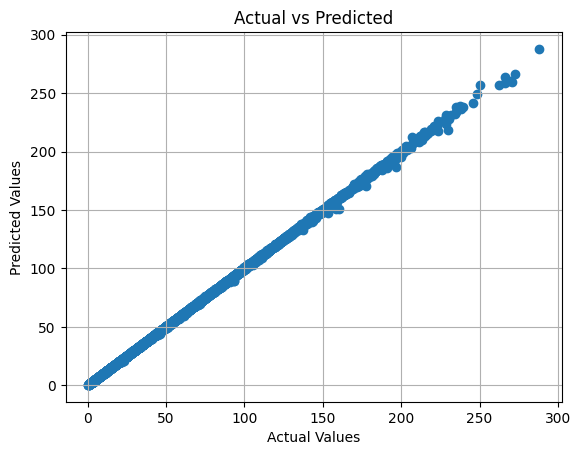

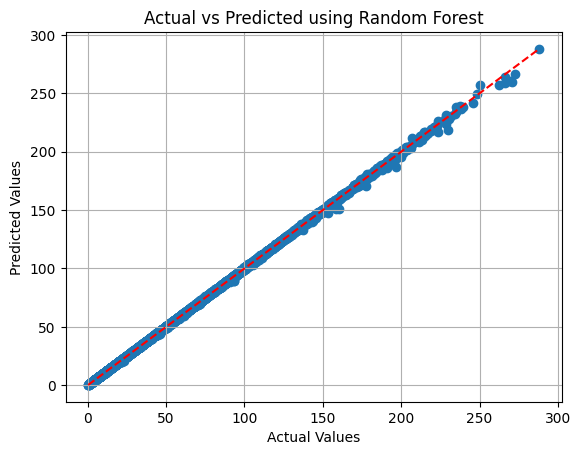

In [11]:
import numpy as np
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='r')  # Ideal case line (y = x)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted using Random Forest')
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score, median_absolute_error, max_error


mape = mean_absolute_percentage_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_e = max_error(y_test, y_pred)


metrics_dict = {
    "Metric": ["MAE", "MSE", "RMSE", "R2 Score", "MAPE", "Explained Variance", "Median Absolute Error", "Max Error", "Adjusted R2"],
    "Value": [mae, mse, rmse, r2, mape, evs, medae, max_e, r2 - (1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)]
}


metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)


                  Metric      Value
0                    MAE   0.110708
1                    MSE   0.102046
2                   RMSE   0.319446
3               R2 Score   0.999916
4                   MAPE   0.002901
5     Explained Variance   0.999916
6  Median Absolute Error   0.044123
7              Max Error  11.459328
8            Adjusted R2   0.999833
